### 교차검증
- 머신러닝 모델 개발 과정 중 모델이 과적합(overfit)되지 않으면서 데이터를 정확히 학습하는지 확인하는 단계

In [1]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/input/masterclass/winequality-red.csv')

In [2]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


task: 와인의 질(quality)예측
- 고정산
- 휘발성산
- 구연산
- 잔당
- 염화물
- 자유아황산가스
- 총 아황산가스
- 밀도
- pH
- 황산염
- 알콜

In [3]:
# 와인의 질 값을 0에서 5로 매핑
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}

df.loc[:, 'quality'] = df.quality.map(quality_mapping)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,3
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,3
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,2


- 성공적으로 매핑을 수행
- 시각화하기 쉽게 의사결정트리로 시작
- 먼저 1599개의 샘플 중 1000개만 학습에 사용

In [4]:
# sample 함수에 frac=1을 적용하여 데이터프레임을 섞는다
# 이 과정이 인덱스 값을 변경하므로 인덱스를 리셋한다
df = df.sample(frac=1).reset_index(drop=True)

# 첫 1000개의 샘플을 학습용으로 선택
df_train = df.head(1000)

# 나머지 599개의 샘플을 시험/검증용으로 선택
df_test = df.tail(599)

In [5]:
from sklearn import tree, metrics
# 의사결정트리 클래스 초기화, max_depth=3 사용
clf = tree.DecisionTreeClassifier(max_depth=3)

# 학습 진행
clf.fit(df_train.drop('quality', axis=1), df_train.quality)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [6]:
# 학습 데이터에 대한 예측 값 생성
train_predictions = clf.predict(df_train.drop('quality', axis=1))

# 시험 데이터에 대한 예측 값 생성
test_predictions = clf.predict(df_test.drop('quality', axis=1))

# 학습 데이터 예측 값 정확도 계산
train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)

# 시험 데이터 예측 값 정확도 계산
test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)

# 예측 값 출력
print(train_accuracy, test_accuracy)

0.578 0.5342237061769616


- 각각 57.5%, 55.4%의 정확도
- max_depth에 따른 정확도를 계산하여 그래프로 출력

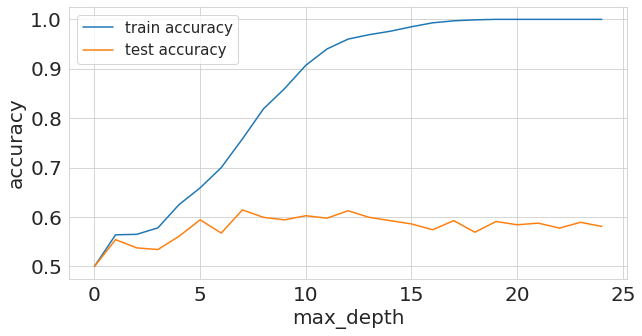

In [7]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# 그래프의 텍스트 크기 설정
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

# 학습/ 테스트 데이터의 정확도를 저장할 리스트
# 50%로 초기화
train_accuracies = [0.5]
test_accuracies = [0.5]

# 1부터 24까지의 depth 값으로 반복
for depth in range(1, 25):
    # 모델 초기화
    clf = tree.DecisionTreeClassifier(max_depth=depth)

    # 학습 진행
    clf.fit(df_train.drop('quality', axis=1), df_train.quality)

    # 학습 및 시험의 예측값 생성
    train_predictions = clf.predict(df_train.drop('quality', axis=1))
    test_predictions = clf.predict(df_test.drop('quality', axis=1))

    # 학습 및 시험 정확도 계산
    train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
    test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)

    # 정확도 리스트에 추가
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# 그래프 그리기
plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')
plt.plot(train_accuracies, label = 'train accuracy')
plt.plot(test_accuracies, label = 'test accuracy')
plt.legend(loc='upper left', prop={'size':15})
plt.xticks(range(0, 26, 5))
plt.xlabel('max_depth', size=20)
plt.ylabel('accuracy', size=20)
plt.show()

- max_depth가 16일 때 최고의 시험 정확도
- 더 증가시 시험 데이터 정확도는 같거나 나빠짐
- max_depth 값이 증가함에 따라 학습 데이터를 더 잘 학습하지만, 시험 데이터 성능은 향상되지 않음
    - 이를 오버피팅(overfitting)이라 부름



### KFOLD

Text(0, 0.5, 'count')

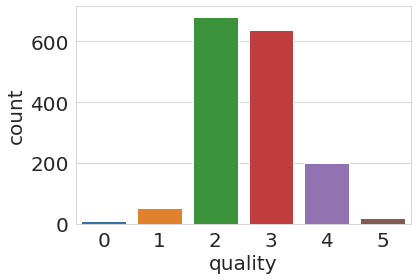

In [8]:
b = sns.countplot(x='quality', data=df)
b.set_xlabel('quality', fontsize=20)
b.set_ylabel('count', fontsize=20)

- 타겟 변수의 분포가 치우쳐 있음(주로 2,3,4)
- 이 경우 stratifiedKFold를 사용해야 함 (일반적으로 다 stratifiedKFold를 사용)
- 데이터가 매우 많은 경우에는 홀드아웃 검증을 사용하는 것이 좋음
- 데이터가 아주 작은 경우 LOO 검증을 사용하는 것이 좋음 

In [11]:
# 회귀분석을 위한 계층-kfold 예제
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import model_selection

def create_folds(data):
    # kfold라는 새로운 열을 생성하고 -1로 채우기
    data['kfold'] = -1

    # 데이터의 행을 랜덤하게 섞음
    data = data.sample(frac=1).reset_index(drop=True)

    # Struge 룰로 타겟 변수를 나눌 그룹의 개수 계산
    # 여기서는 내림을 사용했지만 반올림을 사용할 수도 있음
    """
    struge 룰: 데이터가 N개 존재할 때 그룹을 1 + log2(N)개로 나누는 방법
    """
    num_bins = int(np.floor(1 + np.log2(len(data))))

    # 타겟 변수를 그룹으로 나누기
    data.loc[:, 'bins'] = pd.cut(
        data['target'], bins=num_bins, labels=False
    )
    
    # kfold 클래스 초기화
    kf = model_selection.StratifiedKFold(n_splits=5)

    # kfold열을 원래 타겟 변수값이 아닌 그룹 인덱스를 사용하여 채움
    for f, (t_, v_) in enumerate(kf.split(X=data, y=data.bins.values)):
        data.loc[v_, 'kfold'] = f

    # 중간 과정에서 사용한 bins 열 삭제
    data = data.drop('bins', axis=1)

    # 폴드 값을 추가한 데이터 프레임 반환
    return data

if __name__ == "__main__":
    # 타겟 변수 1개, 피쳐 100개로 구성된 샘플 15,000 개의 샘플 데이터 생성
    X, y = datasets.make_regression(
        n_samples=15000, n_features=100, n_targets=1
    )

    # 데이터프레임 생성
    df = pd.DataFrame(
        X, 
        columns = [f"f_{i}" for i in range(X.shape[1])]
    )
    df.loc[:, 'target'] = y

    df = create_folds(df)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [12]:
df

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,...,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,target,kfold
0,-2.749849,0.289690,1.645676,0.685168,0.108036,0.492744,-0.701065,0.464926,1.064075,-0.430688,1.570279,1.246134,0.282110,0.818623,1.496012,-2.226845,-0.142811,-0.415458,-0.528637,1.145136,-0.151249,0.969653,0.510099,0.571104,0.128240,-0.592393,-1.103518,-0.317978,1.524409,0.298180,0.632225,-0.951663,-1.036442,-0.833064,1.021138,-0.264843,0.998368,-1.467776,0.550579,-0.710108,...,-1.403512,-1.867211,-0.779793,-0.108736,-0.988867,-0.329562,0.010822,-0.846505,0.270954,-0.438014,-1.313021,1.138499,-0.127145,0.226330,0.192021,0.086393,0.361743,-0.880712,1.260217,0.136801,0.191146,0.482941,-0.756981,0.841312,0.242434,0.693851,0.261555,2.714345,0.668691,-0.996011,-0.218242,2.561460,-0.343121,1.468195,1.098830,-0.217089,-0.857995,0.011707,228.653741,0
1,-0.499224,-1.347939,-0.031969,-0.153784,-1.522457,-2.069635,1.488879,2.486153,-0.037517,-0.395478,-1.239032,2.131763,2.425196,-0.109424,1.151205,-1.999497,-0.019469,-0.879447,-1.293744,0.436781,0.489143,-1.106672,0.249535,0.782145,1.410324,-1.147394,-0.777583,-0.038960,-0.359190,-0.711135,1.388718,-0.800080,1.112593,0.833375,-1.314672,-0.280836,0.723152,-0.086010,-0.952703,-2.740160,...,0.337519,0.534925,-2.235349,-0.147820,-0.833954,-0.620411,0.818030,0.638967,-1.672959,-0.005900,0.616107,-0.852626,-0.591643,0.669812,1.695678,1.042196,0.055494,-0.697715,-0.560677,-0.159876,1.231660,0.212156,0.810190,-0.194306,0.715318,1.891792,0.203412,0.946973,-0.201249,-0.885741,-0.180865,-0.803999,0.986033,-0.753336,-0.336168,-2.058027,-0.194298,0.410839,77.353017,0
2,-0.425366,1.526849,-0.120298,0.357508,-0.397610,-0.774376,0.580187,0.632042,-0.306130,-0.979778,-1.034012,0.469314,-0.005132,0.160406,-0.699736,0.152319,-0.250986,-0.502455,-0.711361,-1.285997,0.916853,-0.413080,0.500439,0.929221,1.361513,-1.087430,0.901524,0.151896,0.559022,1.853664,-3.945862,0.349620,0.472773,-0.020533,1.071941,-0.673778,-0.406680,0.512173,0.476993,-0.260380,...,-0.308879,0.740850,-1.313183,-1.658359,0.704357,-0.108498,0.560685,-0.258718,0.407234,0.872659,-0.233538,-2.765961,0.224905,-1.103184,1.186406,0.624168,1.646177,1.059416,-0.655212,1.493718,-0.033382,-3.062824,-0.397414,0.850671,2.176843,-1.188811,0.543591,-3.206636,-0.553241,-0.436207,-0.986399,1.845943,-0.616648,-1.011002,-1.887047,1.235102,-0.044776,-0.588417,-243.388429,0
3,-0.366448,0.634613,0.487501,-1.169748,-0.607621,-0.177857,0.245230,-1.512374,-1.945166,-0.501066,1.529678,0.738616,1.609899,1.203136,-0.324577,0.636439,-1.359982,0.229667,0.309473,0.128813,0.823604,-0.012099,-0.494301,-1.462815,0.510608,1.058313,-0.210367,0.826871,0.628290,0.635584,-0.362633,0.215353,-0.232064,-0.807410,-1.650898,-1.410115,0.933504,0.320036,0.735780,-0.530944,...,0.914111,0.171718,0.380864,-1.390777,0.193980,-0.009718,0.871504,-1.433352,-0.526472,0.027493,-0.459628,0.424112,1.491386,1.500783,-1.186484,0.200449,1.301755,0.424163,-0.303122,-0.201395,-0.052175,-1.260397,1.081247,-0.065998,-1.480151,2.016687,-0.723250,-1.044128,0.091430,-0.554426,1.120901,0.795315,0.907915,0.308846,0.421408,-1.646093,0.561341,0.468962,112.752423,0
4,1.383630,-0.149595,0.544866,0.285020,-0.200150,-0.777809,0.116965,0.372984,-0.987604,-0.070012,0.577605,0.518134,-1.003614,-0.380950,-0.578978,-0.926673,-0.716419,-0.513423,-0.131017,-0.512707,-0.429879,1.631888,-1.570552,0.699787,-1.059336,-1.631603,-0.024295,1.310305,0.157591,-1.214455,-0.412821,0.451435,-1.044076,-0.744907,-3.047262,-1.006931,1.354180,0.599750,1.849717,-1.274900,...,-0.987876,1.106546,0.630908,1.869692,-0.102824,0.317780,-0.701209,0.430412,-1.616469,0.348754,0.345300,0.836500,0.980940,1.548990,0.971185,-0.375298,0.239242,0.157410,-0.